# Remember!!!

Universal workflow of machine learning

1. **Defining the problem and assembling a dataset**
2. **Choosing a measure of success**
3. **Deciding on an evaluation protocol**
4. **Preparing your data**
5. **Developing a model that does better than a baseline**
6. **Scaling up: developing a model that overfits**
7. **Regularizing your model and tuning your hyperparameters**

# 1. Introduction to Kaggle

[Kaggle](https://www.kaggle.com/) is a site where people create algorithms and compete against machine learning practitioners around the world. Your algorithm wins the competition if it's the most accurate on a particular data set. Kaggle is a fun way to practice your machine learning skills.

In this chapter we're going to learn how to compete in Kaggle competitions. In this introductory mission we'll learn how to:

- Approach a Kaggle competition
- Explore the competition data and learn about the competition topic
- Prepare data for machine learning
- Train a model
- Measure the accuracy of your model
- Improving the features we train our model on
- Prepare and make your first Kaggle submission.

Kaggle has created a number of competitions designed for beginners. The most popular of these competitions, and the one we'll be looking at, is about predicting which [passengers survived the sinking of the Titanic](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic).

In this competition, we have a data set of different information about passengers onboard the Titanic, and we see if we can use that information to predict whether those people survived or not. Before we start looking at this specific competition, let's take a moment to understand how Kaggle competitions work.

Each Kaggle competition has two key data files that you will work with - a **training set** and a **testing set**.

The training set contains data we can use to train our model. It has a number of feature columns which contain various descriptive data, as well as a column of the target values we are trying to predict: in this case, **Survival**.

The testing set contains all of the same feature columns, but is missing the target value column. Additionally, the testing set usually has fewer observations (rows) than the training set.

<img width="500" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1ESRBXN3nOU5H3_WxljfLiDBjfXdgzyfM">

This is useful because we want as much data as we can to train our model on. Once we have trained our model on the training set, we will use that model to make predictions on the data from the testing set, and submit those predictions to Kaggle.

[In this competition](https://www.kaggle.com/c/titanic/data), the two files are named **test.csv** and **train.csv**. We'll start by using the pandas library to read both files and inspect their size.

In [136]:
import pandas as pd

df_test = pd.read_csv("data/test.csv", sep = ",")
df_train = pd.read_csv("data/train.csv", sep = ",")

train_shape = df_train.shape
test_shape = df_test.shape

print('Train:' + str(train_shape) + "\nTest: " + str(test_shape))

Train:(891, 12)
Test: (418, 11)


2. Exploring the Data
==

The files we read in the previous screen are available on [the data page for the Titanic competition on Kaggle](https://www.kaggle.com/c/titanic/data). That page also has a **data dictionary**, which explains the various columns that make up the data set. Below are the descriptions contained in that data dictionary:

- **PassengerID** - A column added by Kaggle to identify each row and make submissions easier
- **Survived** - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- **Pclass** - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- **Sex** - The passenger's sex
- **Age** - The passenger's age in years
- **SibSp** - The number of siblings or spouses the passenger had aboard the Titanic
- **Parch** - The number of parents or children the passenger had aboard the Titanic
- **Ticket** - The passenger's ticket number
- **Fare** - The fare the passenger paid
- **Cabin** - The passenger's cabin number
- **Embarked** - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

The data page on Kaggle has some additional notes about some of the columns. It's always worth exploring this in detail to get a full understanding of the data.

The first 5 rows of the data is below:


In [137]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [139]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

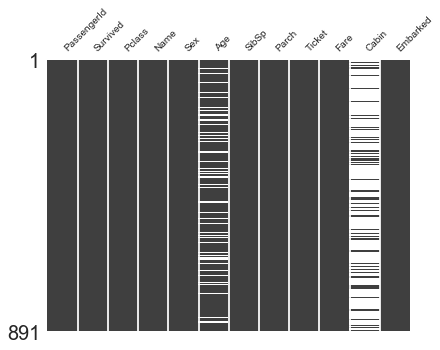

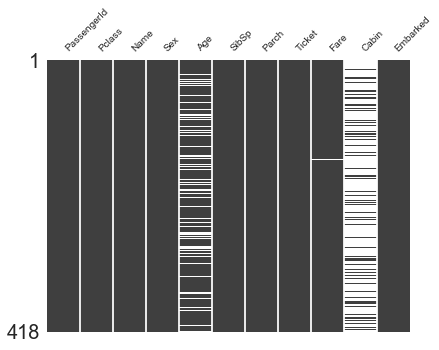

In [140]:
import missingno as msno
%matplotlib inline
# missing values - Train
msno.matrix(df_train, figsize=(6.5,5), fontsize=10, sparkline=False) 

# missing values - Test
msno.matrix(df_test, figsize=(6.5,5), fontsize=10, sparkline=False) 

The type of machine learning we will be doing is called **classification**, because when we make predictions we are classifying each passenger as survived or not. More specifically, we are performing **binary classification**, which means that there are only two different states we are classifying.

In any machine learning exercise, thinking about the topic you are predicting is very important. We call this step acquiring domain knowledge, and it's one of the most important determinants for success in machine learning.

In this case, understanding the Titanic disaster and specifically what variables might affect the outcome of survival is important. Anyone who has watched the movie Titanic would remember that women and children were given preference to lifeboats (as they were in real life). You would also remember the vast class disparity of the passengers.


<img width="1000" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1S1-LlDSgyNmqhTjATBQezZY_jlldOwDS">

This indicates that **Age**, **Sex**, **PClass**, **Embarked** and **Family Size** may be good predictors of survival. 

Because the **Survived** column contains 0 if the passenger did not survive and 1 if they did, we can segment our data using **DataFrame.pivot_table()**. 

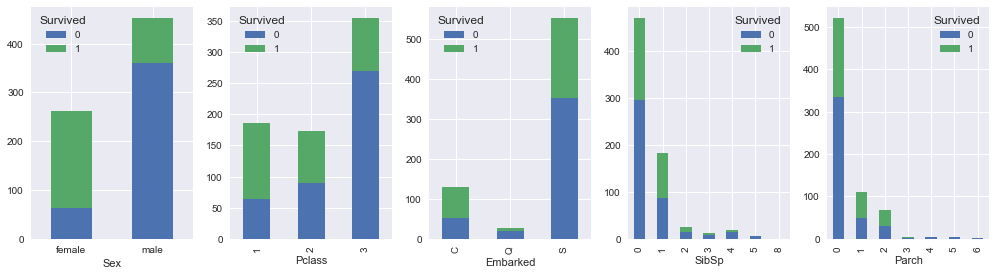

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(14,4))

sex_pivot = df_train.pivot_table(index="Sex",columns="Survived",values="Age",aggfunc="count")
sex_pivot.plot.bar(ax=ax1,stacked=True)
ax1.tick_params(rotation=0)

class_pivot = df_train.pivot_table(index="Pclass",columns="Survived",values="Age",aggfunc="count")
class_pivot.plot.bar(ax=ax2,stacked=True)

embark_pivot = df_train.pivot_table(index="Embarked",columns="Survived",values="Age",aggfunc="count")
embark_pivot.plot.bar(ax=ax3,stacked=True)

sib_pivot = df_train.pivot_table(index="SibSp",columns="Survived",values="Age",aggfunc="count")
sib_pivot.plot.bar(ax=ax4,stacked=True)

parch_pivot = df_train.pivot_table(index="Parch",columns="Survived",values="Age",aggfunc="count")
parch_pivot.plot.bar(ax=ax5,stacked=True)



f.tight_layout()

plt.show()


## 2.1 Gender vs class vs survived vs age

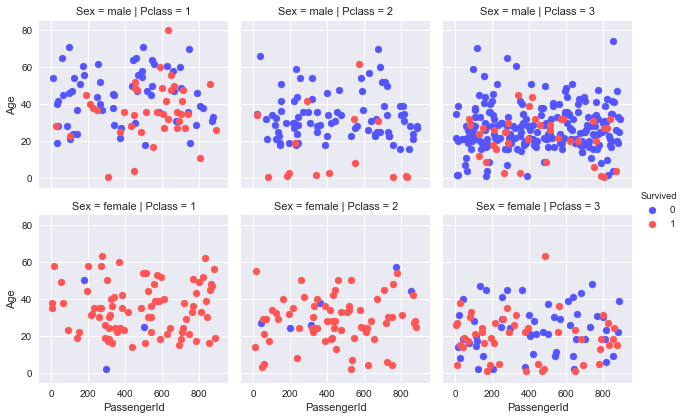

In [142]:
grid = sns.FacetGrid(df_train, col = "Pclass", row = "Sex", hue = "Survived", palette = 'seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

### Remark
What did you conclude from the previous figure?

## 2.2 Embarked vs Pclass vs Survivied vs Age

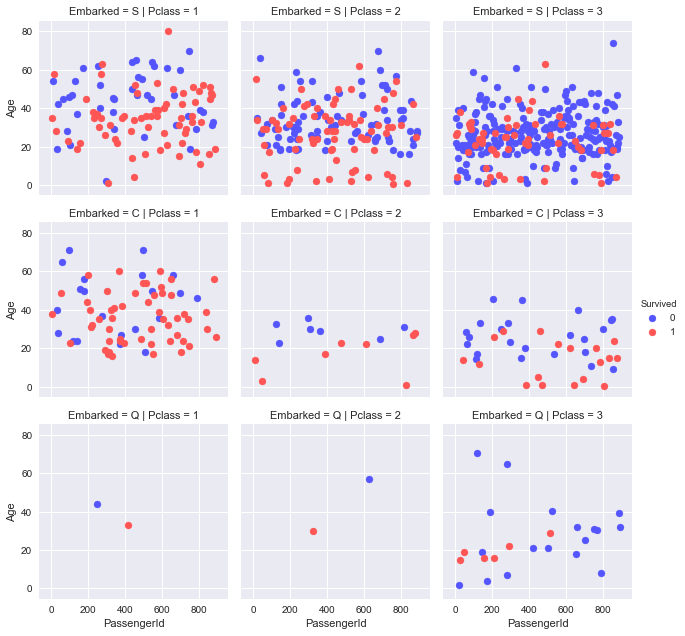

In [143]:
# embarked vs pclass vs survived
grid = sns.FacetGrid(df_train, col = "Pclass", row = "Embarked", hue = "Survived", palette = 'seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

## 2.3 SibsSp vs Parch vs Pclass vs Survived vs Age

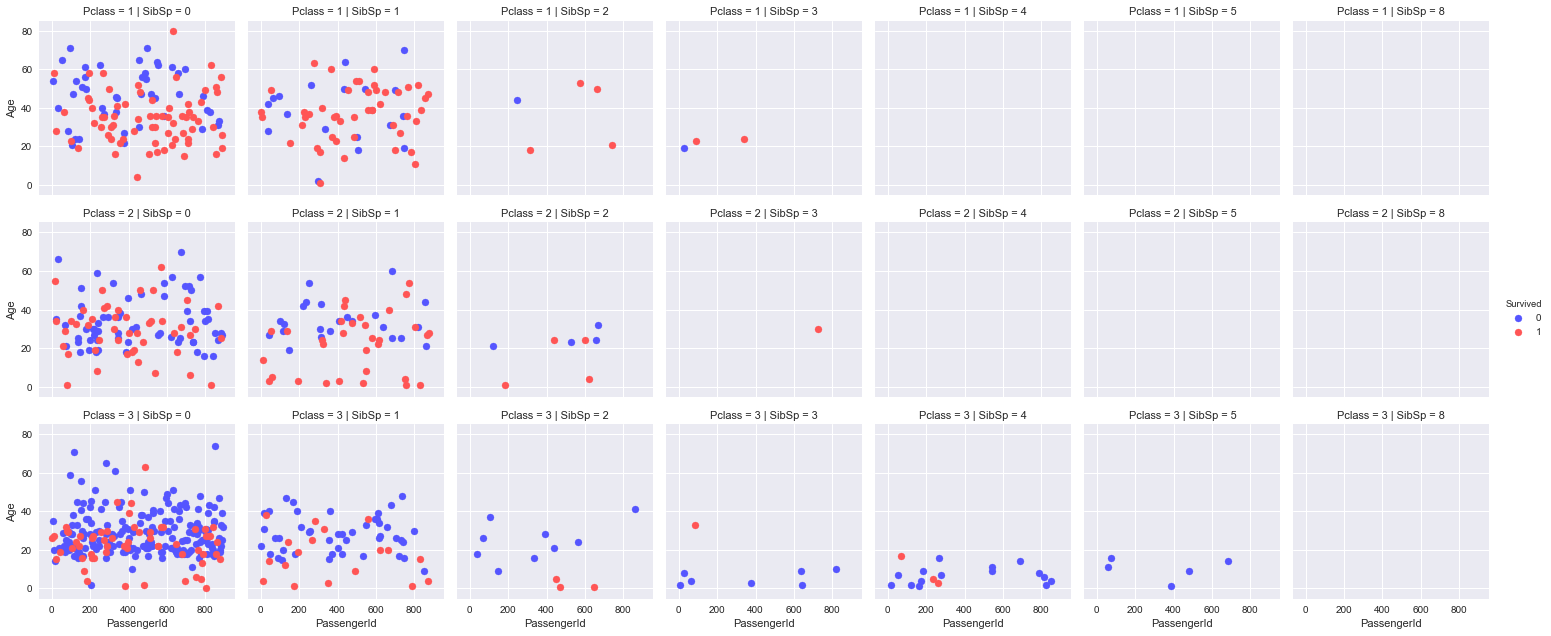

In [144]:
# SibSp vs pclass vs survived
grid = sns.FacetGrid(df_train, col = "SibSp", row = "Pclass", hue = "Survived", palette = 'seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

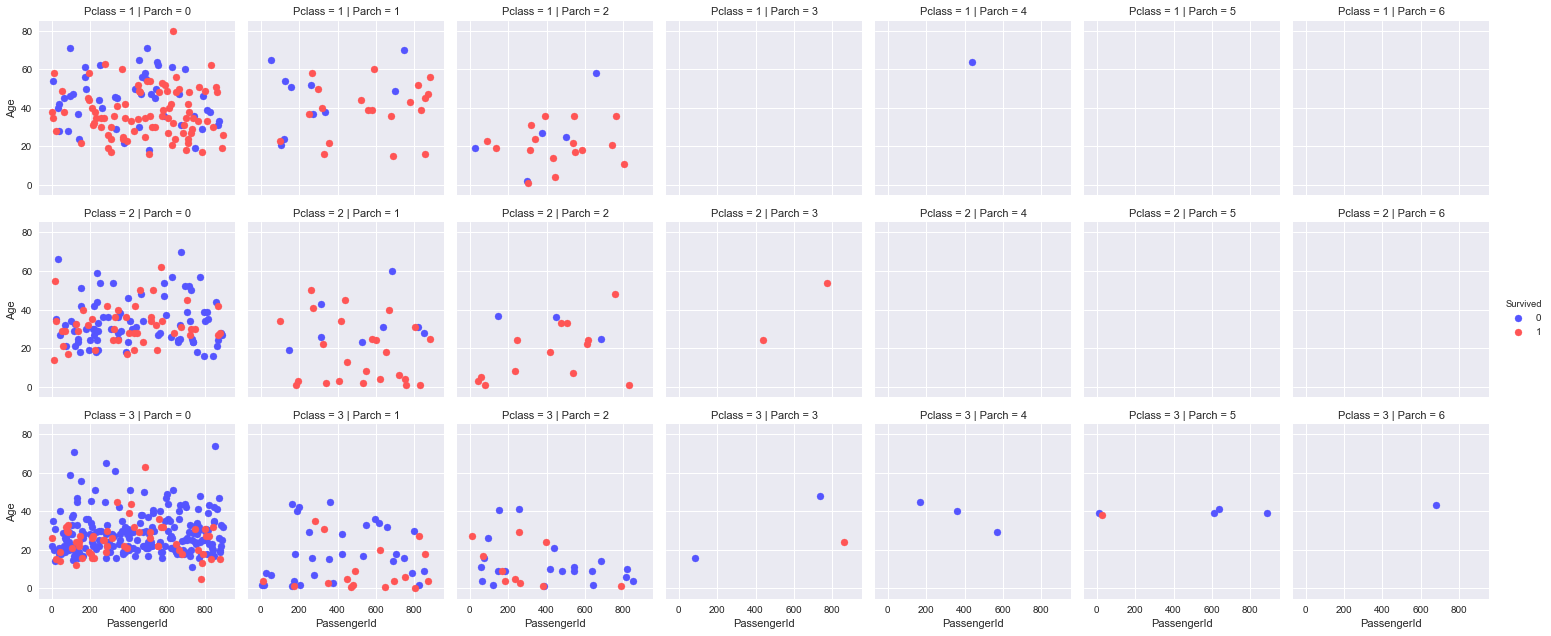

In [145]:
# Parch vs pclass vs survived
grid = sns.FacetGrid(df_train, col = "Parch", row = "Pclass", hue = "Survived", palette = 'seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

In [146]:
df_aux = df_train.copy()
df_aux['familysize'] = df_aux.SibSp + df_aux.Parch + 1

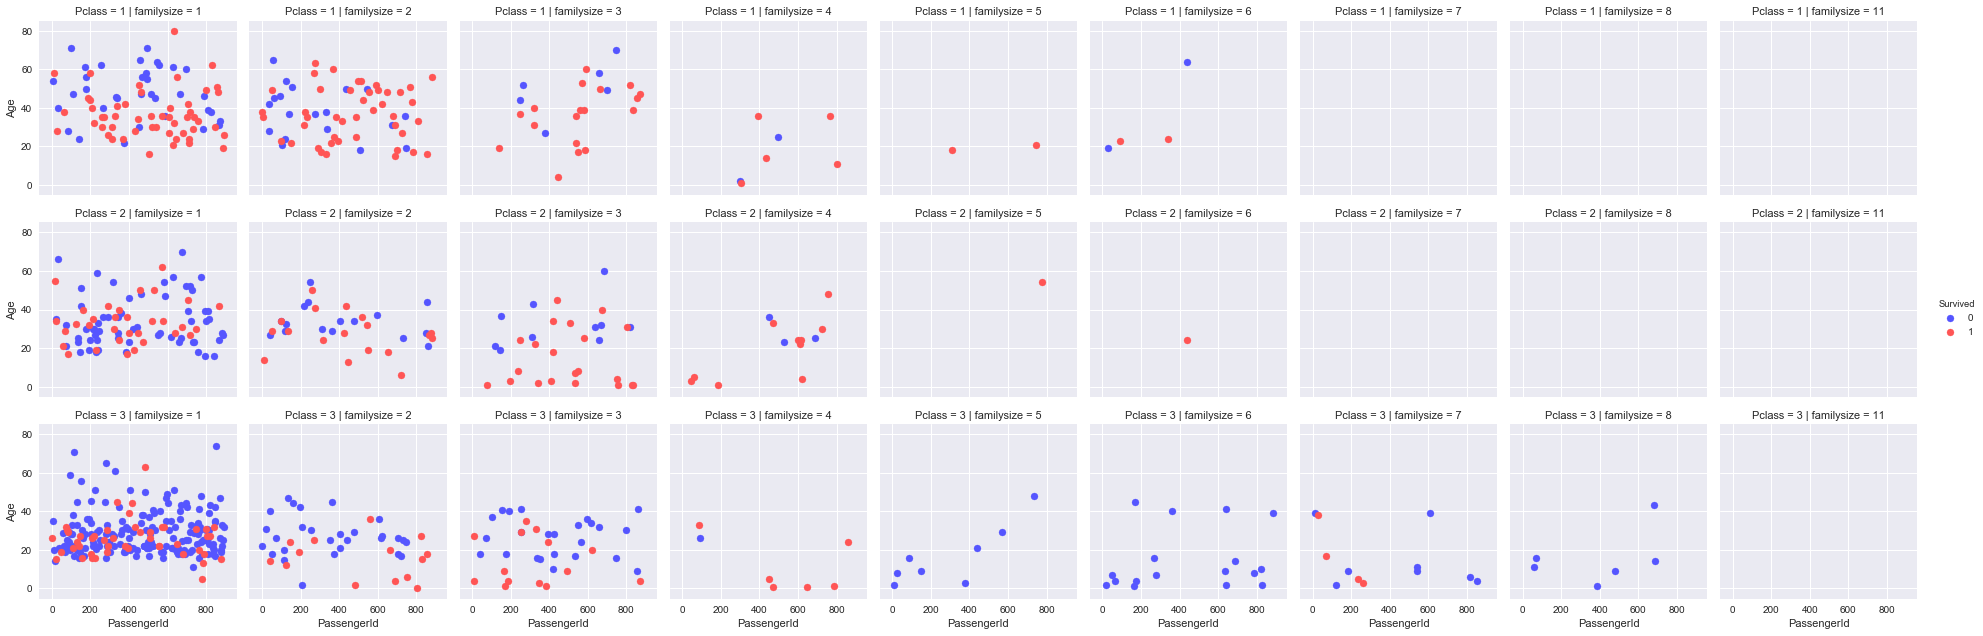

In [147]:
# Familysize vs pclass vs survived
grid = sns.FacetGrid(df_aux, col = "familysize", row = "Pclass", hue = "Survived", palette = 'seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

## 2.4 Age

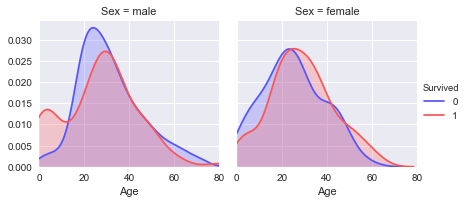

In [148]:
# Visualise Age Data 
facet = sns.FacetGrid(df_train, col="Sex", hue="Survived",palette = 'seismic')
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()

In [149]:
df_aux["Age"] = df_aux["Age"].fillna(-0.5)
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
df_aux["Age_categories"] = pd.cut(df_aux["Age"],cut_points,labels=label_names)

In [150]:
df_aux.pivot_table(index='Age_categories', columns='Survived', values='Age', aggfunc='count')

Survived,0,1
Age_categories,,
Missing,125,52
Infant,13,31
Child,16,9
Teenager,40,30
Young Adult,221,137
Adult,117,78
Senior,17,5


## 2.5 Fare

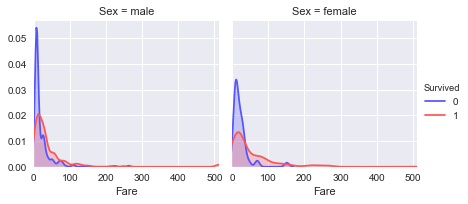

In [151]:
# Visualise Fare Data 
facet = sns.FacetGrid(df_train, col="Sex", hue="Survived",palette = 'seismic')
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()
#plt.xlim(140,170)

In [152]:
df_aux["Fare"] = df_aux["Fare"].fillna(df_aux["Fare"].mean())
cut_points = [-1,16,36,70,1000]
label_names = ["Low","Medium","High","Super-High"]
df_aux["Fare_categories"] = pd.cut(df_aux["Fare"],cut_points,labels=label_names)

In [153]:
df_aux.pivot_table(index=['Fare_categories','Sex'], columns='Survived', values='Age', aggfunc='count')

Survived                  0   1
Fare_categories Sex            
Low             female   43  83
                male    314  45
Medium          female   30  60
                male     88  34
High            female    6  28
                male     39  16
Super-High      female    2  62
                male     27  14

## 2.6 Cabin

In [154]:
# fill Cabin NaN with U for unknown
df_aux.Cabin = df_aux.Cabin.fillna('U')

# map first letter of cabin to itself
df_aux.Cabin = df_aux.Cabin.map(lambda x: x[0])

df_aux.pivot_table(index='Cabin', columns='Survived', values='Age', aggfunc='count')

Survived,0,1
Cabin,,
A,8.0,7.0
B,12.0,35.0
C,24.0,35.0
D,8.0,25.0
E,8.0,24.0
F,5.0,8.0
G,2.0,2.0
T,1.0,NaN
U,481.0,206.0


## 2.7 Ticket

In [173]:
# see https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling
Ticket = []
for i in list(df_aux.Ticket):
    if not i.isdigit():
        #Take prefix
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) 
    else:
        Ticket.append("X")
df_aux["Ticket"] = Ticket

In [175]:
df_aux.pivot_table(index=['Ticket','Sex'], columns='Survived', values='Age', aggfunc='count')

Survived            0      1
Ticket  Sex                 
A4      male      7.0    NaN
A5      female    2.0    NaN
        male     17.0    2.0
AS      male      1.0    NaN
C       female    NaN    1.0
        male      3.0    1.0
CA      female    5.0   10.0
        male     22.0    4.0
CASOTON male      1.0    NaN
FC      male      1.0    NaN
FCC     female    NaN    4.0
        male      1.0    NaN
Fa      male      1.0    NaN
LINE    male      3.0    1.0
PC      female    1.0   28.0
        male     20.0   11.0
PP      female    NaN    2.0
        male      1.0    NaN
PPP     female    NaN    1.0
        male      1.0    NaN
SC      female    NaN    1.0
SCA4    male      1.0    NaN
SCAH    female    NaN    2.0
        male      1.0    NaN
SCOW    male      1.0    NaN
SCPARIS female    NaN    1.0
        male      4.0    2.0
SCParis female    NaN    2.0
        male      2.0    NaN
SOC     female    NaN    1.0
        male      5.0    NaN
SOP     male      1.0    NaN
SOPP    female    1.0    NaN
        male      2.0    NaN
SOTONO2 male      2.0    NaN
SOTONOQ female    1.0    NaN
        male     12.0    2.0
SP      male      1.0    NaN
STONO   male      7.0    5.0
STONO2  female    2.0    3.0
        male      1.0    NaN
SWPP    male      NaN    2.0
WC      female    5.0    1.0
        male      4.0    NaN
WEP     female    NaN    1.0
        male      2.0    NaN
X       female   64.0  175.0
        male    343.0   79.0

# 3. Data preparation

In [155]:
def process_ticket(df):
    # see https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling
    Ticket = []
    for i in list(df.Ticket):
        if not i.isdigit():
            #Take prefix
            Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) 
        else:
            Ticket.append("X")
    df["Ticket"] = Ticket
    return df

def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    df = process_missing(df)
    """
    df["Fare"] = df["Fare"].fillna(df["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    df["Cabin"] = df["Cabin"].fillna('U')

    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    df = process_age(df)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    df.drop("Age",inplace=True,axis=1)
    
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    df = process_fare(df)
    """
    cut_points = [-1,16,36,70,1000]
    label_names = ["Low","Medium","High","Super-High"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    df.drop("Fare",inplace=True,axis=1)
    
    return df


def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    df = process_titles(df)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    df.drop("Name",inplace=True,axis=1)
    
    return df

def process_family(df):
    """Process the SibSp and Parch columns into a family size column 

    Usage
    ------

    df = process_family(df)
    """
    df['familysize'] = df.SibSp + df.Parch + 1
    df.drop(["SibSp","Parch"],inplace=True,axis=1)
    return df

def process_cabin(df):
    # map first letter of cabin to itself
    df["Cabin"] = df["Cabin"].map(lambda x: x[0])
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    df = create_dummies(df,"column")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    df.drop(column_name,inplace=True,axis=1)
    return df

In [156]:
def pre_process(df):
    df = process_ticket(df)
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_family(df)
    df = process_cabin(df)
    
    for col in ["Age_categories","Fare_categories","Sex","Pclass","Embarked","Title","Ticket","Cabin"]:
        df = create_dummies(df,col)
        
    return df

In [157]:
df_train = pre_process(df_train)
df_test =  pre_process(df_test)

In [158]:
df_train.columns

Index(['PassengerId', 'Survived', 'familysize', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Fare_categories_Low',
       'Fare_categories_Medium', 'Fare_categories_High',
       'Fare_categories_Super-High', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Ticket_A4', 'Ticket_A5', 'Ticket_AS', 'Ticket_C',
       'Ticket_CA', 'Ticket_CASOTON', 'Ticket_FC', 'Ticket_FCC', 'Ticket_Fa',
       'Ticket_LINE', 'Ticket_PC', 'Ticket_PP', 'Ticket_PPP', 'Ticket_SC',
       'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW', 'Ticket_SCPARIS',
       'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP', 'Ticket_SOPP',
       'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_SP', 'Ticket_STONO',
     

In [160]:
df_test.columns 

Index(['PassengerId', 'familysize', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Fare_categories_Low',
       'Fare_categories_Medium', 'Fare_categories_High',
       'Fare_categories_Super-High', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Ticket_A', 'Ticket_A4', 'Ticket_A5', 'Ticket_AQ3',
       'Ticket_AQ4', 'Ticket_C', 'Ticket_CA', 'Ticket_FC', 'Ticket_FCC',
       'Ticket_LP', 'Ticket_PC', 'Ticket_PP', 'Ticket_SC', 'Ticket_SCA3',
       'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCPARIS', 'Ticket_SCParis',
       'Ticket_SOC', 'Ticket_SOPP', 'Ticket_SOTONO2', 'Ticket_SOTONOQ',
       'Ticket_STONO', 'Ticket_STONO2', 'Ticket_STONOQ', 'Ticket_WC',
       'Ticket_WE

In [202]:
## Filtering target columns

columns = list(df_test.columns & df_train.columns)
columns.remove("PassengerId")

# keras only suppport tensor, not dataframes
train_data = df_train[columns].as_matrix().astype('float32')
train_label = df_train.Survived.as_matrix().astype('float32')
test_data = df_test[columns].as_matrix().astype('float32')


In [207]:
train_data.shape

(891, 56)

In [208]:
train_label.shape

(891,)

# 4. Exploring the Gridsearch to create models

In [244]:
# configuration of model (hyperparameters, hidden unit size, epochs, batch, so on)
hidden_units = [64]
activations_funct = ['relu']
loss_funct = ['binary_crossentropy']
epochs = [50,100,200,400]
batch_size = [30]
id_models = [8]

# variables used to store the results
training = []
models_result = []
config = []
time_experiment = []

In [245]:
# keras libraries
from keras import models
from keras import layers
from keras import regularizers

# Create different models
def create_model(id_model, hidden,activations,losses):
    
    model = models.Sequential()
    if id_model == 0:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 1:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 2:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 3:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden//2, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 4:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden//2, activation=activations))
        model.add(layers.Dense(hidden//4, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 5:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden//2, activation=activations))
        model.add(layers.Dense(hidden//4, activation=activations))
        model.add(layers.Dense(hidden//8, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 6:
        model.add(layers.Dense(hidden, activation=activations,input_shape=(train_data.shape[1],)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 7:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden//2, activation=activations))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 8:
        model.add(layers.Dense(hidden, activation=activations,input_shape=(train_data.shape[1],)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden//2, activation=activations))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden//4, activation=activations))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden//8, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 9:
        model.add(layers.Dense(hidden, activation=activations,input_shape=(train_data.shape[1],)))
        model.add(layers.Dropout(0.25))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dropout(0.25))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 10: 
        model.add(layers.Dense(hidden, activation=activations,input_shape=(train_data.shape[1],)))
        model.add(layers.Dropout(0.1))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dropout(0.1))
        model.add(layers.Dense(1, activation='sigmoid'))
    else:
        # todo
        model.add(layers.Dense(hidden, activation=activations,input_shape=(train_data.shape[1],),
                               kernel_initializer="lecun_normal"))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(1, activation='sigmoid'))
    
    # compile the model
    model.compile(optimizer='rmsprop',loss=losses,metrics=['accuracy'])
    
    return model

In [246]:
# utils
import time
from datetime import timedelta

# For performance evaluation
start_time_ = time.time()

# Gridsearch
for id_model in id_models:
    for hidden in hidden_units:
        for activations in activations_funct:
            for losses in loss_funct:
                for epoch in epochs:
                    for batch in batch_size:
                        # Measure the duration of experiment
                        start_time = time.time()
                        print(time.strftime("%H:%M:%S " + "GridSearch started ... " ))
                        print("Model: " + str([id_model,hidden,activations,losses,epoch,batch]))
                        
                        # create a model
                        model = create_model(id_model,hidden,activations,losses)

                        # Training your model
                        history = model.fit(train_data,
                                            train_label,
                                            epochs=epoch,
                                            batch_size=batch,
                                            validation_split=0.1,
                                            verbose=0)

                        # keep all previous models and results
                        config.append([id_model,hidden,activations,losses,epoch,batch])
                        training.append(history)
                        models_result.append(model)
                        
                        # Elapsed time since the start of experiment
                        elapsed_time = time.time() - start_time
                        time_experiment.append(timedelta(seconds=elapsed_time))
                        print("Time elapsed: ", time_experiment[-1])
                        
elapsed_time_ = time.time() - start_time_
print("Time elasped total: ", timedelta(seconds=elapsed_time_))

15:14:55 GridSearch started ... 
Model: [8, 64, 'relu', 'binary_crossentropy', 50, 30]
Time elapsed:  0:00:08.304641
15:15:03 GridSearch started ... 
Model: [8, 64, 'relu', 'binary_crossentropy', 100, 30]
Time elapsed:  0:00:14.373025
15:15:17 GridSearch started ... 
Model: [8, 64, 'relu', 'binary_crossentropy', 200, 30]
Time elapsed:  0:00:25.917778
15:15:43 GridSearch started ... 
Model: [8, 64, 'relu', 'binary_crossentropy', 400, 30]
Time elapsed:  0:00:52.288553
Time elasped total:  0:01:40.884720


IndexError: list index out of range

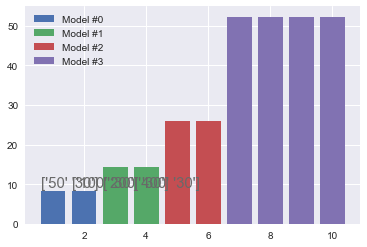

In [247]:
import numpy as np

# create a figura
fig, ax = plt.subplots()

# adapt the data to seconds
total_seconds = [time_.total_seconds() for time_ in time_experiment]

# separate values into each model
number_of_models = len(id_models)
items_by_model = len(training)//number_of_models

# distance separator
range_ = 1

for i,array in enumerate(np.array_split(total_seconds,items_by_model)): 
    ax.bar(np.arange(items_by_model)+range_, array, label="Model #" + str(i))
    ax.legend()
    range_ += 2

for index,i in enumerate(ax.patches):
    ax.text(i.get_x(), 
            i.get_height()+1, 
            str(np.array(config[index])[[4,5]]), 
            fontsize=15,color='dimgrey')
#plt.bar(range(1,len(total_seconds)+1),total_seconds)
plt.xlabel("#experiment id")
plt.ylabel("Duration in seconds")
plt.title("Duration of experiment " + str(timedelta(seconds=elapsed_time_)))

plt.show()

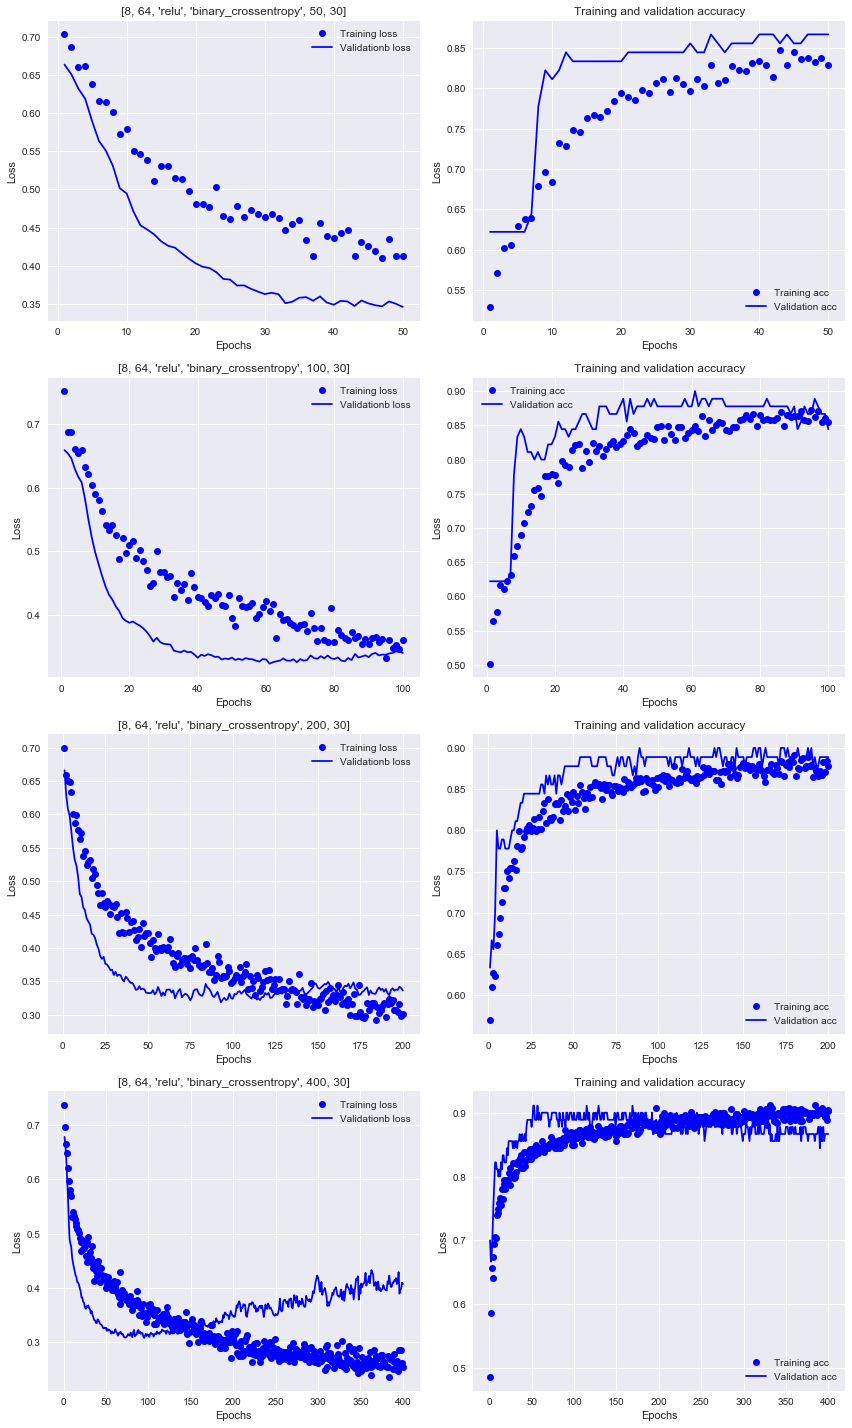

In [248]:
# Plotting the training and validation loss

# create a subplot with the numbers of rows equal to size of trainning
rows = len(training)
fig, ax = plt.subplots(rows, 2, figsize=(12,20))

for i in range(rows):
    history_dict = training[i].history

    # trainning loss X validation loss
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)

    # trainning accuracy X validation accuracy
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']

    ax[i,0].plot(epochs, loss_values, 'bo', label='Training loss')
    ax[i,0].plot(epochs, val_loss_values, 'b', label='Validationb loss')
    ax[i,0].set_title(str(config[i]))
    ax[i,0].set_xlabel('Epochs')
    ax[i,0].set_ylabel('Loss')
    ax[i,0].legend()
    #ax1.set_xticks(epochs)

    ax[i,1].plot(epochs, acc_values, 'bo', label='Training acc')
    ax[i,1].plot(epochs, val_acc_values, 'b', label='Validation acc')
    ax[i,1].set_title('Training and validation accuracy')
    ax[i,1].set_xlabel('Epochs')
    #ax2.set_xticks(epochs)
    ax[i,1].set_ylabel('Loss')
    ax[i,1].legend()
    
plt.tight_layout()
plt.show()

## 4.1. Creating a Submission File

The last thing we need to do is create a submission file. Each Kaggle competition can have slightly different requirements for the submission file. Here's what is specified on the [Titanic competition evaluation page](https://www.kaggle.com/c/titanic#evaluation):

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

- PassengerId (sorted in any order)
- Survived (contains your binary predictions: 1 for survived, 0 for deceased)

The table below shows this in a slightly easier to understand format, so we can visualize what we are aiming for.

| PassengerId | Survived |
|-------------|----------|
| 892         | 0        |
| 893         | 1        |
| 894         | 0        |

In [249]:
submission = pd.DataFrame()
submission['PassengerId'] = df_test.PassengerId

for i, models in enumerate(models_result):
    submission['Survived'] = models.predict_classes(test_data)
    # create a csv file
    submission.to_csv("Data/submission_model_" + str(i) + ".csv" ,index=False)

| Model | #Hidden |#Epochs | #Batch | Duration (seconds)     |#Evaluation (accuracy) |
|-------|---------|--------|--------|------------------------|-----------------------| 
|   0   |   64    | 50     |   5    |      24.6677           |0.75598|
|   **0**   |   **64**    | **100**    |   **5**    |      **55.8466**          |**0.78468**|
|   0   |   64    | 200    |   10   |       46.9868          |0.65071|
|   0   |   64    | 200    |    5   |       90.1741          |0.74641|
|   0   |   64    | 200    |    1   |       423.4022         |0.62679|
|   1   |   64    | 50     |   5    |      30.8114           |0.76076|
|   **1**   |   **64**    | **100**    |   **5**    |      **61.6201**           |**0.77033** |
|   1   |   64    | 200    |    10  |       52.6762          |0.66507|
|   1   |   64    | 200    |    5   |       108.1706         |0.75598|
|   1   |   64    | 200    |    1   |       400.0676         |0.76555|
|   2   |   64    | 50    |    5   |       33.2243          |0.58373|
|   2   |   64    | 200    |    10  |       58.2829          |0.37320|
|   2   |   64    | 200    |    5   |       102.1780         |0.61722 |
|   2   |   64    | 200    |    1   |       422.3558         |0.62679 |
|   3   |   64    | 50    |    5   |       27.8506          |0.75598 |
|   3   |   64    | 100   |    5   |       54.3490          |0.74641|
|   3   |   64    | 200    |    10  |       44.1178          |0.74162 |
|   **3**   |   **64**    | **200**    |    **5**   |       **76.0296**          |**0.78947**|
|   3   |   64    | 200    |    1   |       346.2057         |0.37320|
|   4   |   64    | 50    |   5    |       28.5832          |0.76555|
|   4   |   64    | 100   |   5     |       53.2381         | 0.37320|
|   4   |   64    | 200    |    10  |       51.5426          |0.75598|
|   4   |   64    | 200    |    5   |       81.6649          |0.75119 |
|   4   |   64    | 200    |    1   |       392.3536         |0.64114 |
|   5   |   64    | 50    |    5   |       30.5885          |0.56937|
|   **5**   |   **64**    | **100**   |  **5**      |       **57.6668**         | **0.78947**|
|   5   |   64    | 200    |    10  |       51.5978          |0.76076 |
|   5   |   64    | 200    |    5   |       88.0420          |0.77033|
|   5   |   64    | 200    |    1   |       438.3351         |0.66985|
|   **6**   |   **64**    | **100**    |    **5**   |       **77.0347**          |**0.78468**|
|   6   |   64    | 200    |    5   |       147.0646         |0.61244|
|   7   |   64    | 100    |    5   |       74.4839          |0.77033|
|   7   |   64    | 200    |    5   |       129.3385          |0.75598|
|   8   |   64    | 100    |    5   |       94.0294          |0.60287|
|   8   |   64    | 200    |    5   |       144.4415         |0.62679|
|   9   |   64    | 100    |    5   |       77.1295        |0.75598|
|   10   |   64    | 100    |    5   |       72.7501       |0.73684